Uber Assignment


#From the problem statement we can derive the problems faced by Uber as:.Cancellation.
.Non-availability of cars.
The aim of analysis is to identify the root cause of the problem and provide our feedback on the problem and suggest solutions to improve the business.We need to check demand supply and gap for different timeslots and so on

Importing the Required Libraries

In [159]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [160]:
# Importing the Libraries
import pandas as pd
import numpy as np
import random as rnd

# Importing Library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




Importing and Reading the Uber Dataset

In [161]:
uber_df=pd.read_csv('../Assignment_uber/Uber Request Data.csv',encoding = "utf-8")
uber_df=pd.read_csv('../Assignment_uber/Uber Request Data.csv',encoding = "cp1252")

In [162]:
#Inspecting the data
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


We can see that the Request timestamp and drop timestamp column need the data to be formatted

In [163]:
uber_df.dtypes


Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

This line tells the Python interpreter that from the datetime module import the date class We are not writing the code for this date functionality alas just importing it for our use



In [164]:
#Converting the Request timestamp from onject to Date data type
uber_df['Request timestamp'] =pd.to_datetime(uber_df['Request timestamp'],dayfirst=True)





In [165]:
#Converting the Drop timestamp from onject to Date data type
uber_df['Drop timestamp'] =pd.to_datetime(uber_df['Drop timestamp'],dayfirst=True)


In [166]:
#investigating the data
uber_df['Request timestamp'].tail()

6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, dtype: datetime64[ns]

In [167]:
#investigating the data

uber_df['Drop timestamp'].tail()

6740   NaT
6741   NaT
6742   NaT
6743   NaT
6744   NaT
Name: Drop timestamp, dtype: datetime64[ns]

In [168]:
#Checking the datatype to confirm whether the datat type of Request timestamp and drop timestamp changed to Date datatype
#And we can its been change to data datatype and its fine to gohead and do the further analysis
uber_df.dtypes


Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [169]:
# Getting a summary of the dataframe using 'describe()'
uber_df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [170]:
# checking the rows and columns
uber_df.shape

(6745, 6)

In [171]:
#To get the unique values 
uber_df.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

In [172]:
#checking if there are any duplicate request id
uber_df.drop_duplicates('Request id')
uber_df.shape

(6745, 6)

In [173]:
uber_df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [174]:
#### calculate percentage of null values in master_frame
(100*(uber_df.isnull().sum()/len(uber_df.index)),2)

(Request id            0.000000
 Pickup point          0.000000
 Driver id            39.288362
 Status                0.000000
 Request timestamp     0.000000
 Drop timestamp       58.028169
 dtype: float64, 2)

Analysing the columns with Null values.We can see that Driver id has 39.2 percent null values but its null when no cars are 
available so it looks reasonable since there are no cars available hence the no driver is been assigned the request and therefore the Driver id is blank and it shows as Null.As i am not going use this for any analysis i am dropping this column.

In [175]:
#Dropping the driver id

uber_df=uber_df.drop(['Driver id'],axis=1)



In [176]:
#### Re calculate percentage of null values in master_frame after imputing the values to Driver id column
(100*(uber_df.isnull().sum()/len(uber_df.index)),2)

(Request id            0.000000
 Pickup point          0.000000
 Status                0.000000
 Request timestamp     0.000000
 Drop timestamp       58.028169
 dtype: float64, 2)

Exploratory Data Analysis on the uber data set.Here i am goint o check the following
:Trailing and leading spaces or extra spaces in the columns
    :Spell check
        :Lower and upper case check

In [177]:
#Investigating the spelling of the data

Checking_Spell = uber_df.pivot_table(index=['Pickup point'],
                                  values='Request id',
                                  aggfunc='count')
Checking_Spell

,Request id
Pickup point,
Airport,3238
City,3507


In [178]:
# Investigating the string case


uber_df['Pickup point'].str.islower() 
uber_df['Status'].str.islower()


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6715    False
6716    False
6717    False
6718    False
6719    False
6720    False
6721    False
6722    False
6723    False
6724    False
6725    False
6726    False
6727    False
6728    False
6729    False
6730    False
6731    False
6732    False
6733    False
6734    False
6735    False
6736    False
6737    False
6738    False
6739    False
6740    False
6741    False
6742    False
6743    False
6744    False
Name: Status, Length: 6745, dtype: bool

In [179]:
##investigating the string if it has any trailing and leading spaces
uber_df['Pickup point'].str.isspace() 


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6715    False
6716    False
6717    False
6718    False
6719    False
6720    False
6721    False
6722    False
6723    False
6724    False
6725    False
6726    False
6727    False
6728    False
6729    False
6730    False
6731    False
6732    False
6733    False
6734    False
6735    False
6736    False
6737    False
6738    False
6739    False
6740    False
6741    False
6742    False
6743    False
6744    False
Name: Pickup point, Length: 6745, dtype: bool

In [180]:
#investigating the string if it has any trailing and leading spaces
uber_df['Status'].str.isspace()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6715    False
6716    False
6717    False
6718    False
6719    False
6720    False
6721    False
6722    False
6723    False
6724    False
6725    False
6726    False
6727    False
6728    False
6729    False
6730    False
6731    False
6732    False
6733    False
6734    False
6735    False
6736    False
6737    False
6738    False
6739    False
6740    False
6741    False
6742    False
6743    False
6744    False
Name: Status, Length: 6745, dtype: bool

I am checking whether the Pickuppoint has any spelling mistakes as the data cleaning process but it doent have any space.So we are good to ahead and analyse

In [181]:
Checking_Spell_status = uber_df.pivot_table(index=['Status'],
                                  values='Request id',
                                  aggfunc='count')
Checking_Spell_status

,Request id
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


I am checking whether the Status has any spelling mistakes as the data cleaning process but it doesnt have any space .So we are good to ahead and analyse

We can see around  percent null values in the Drop Timestamp column let us investigate and see whether we need to drop those rows or keep them

In [182]:
uber_df[uber_df['Drop timestamp'].isnull()]

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
2831,2905,City,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,Cancelled,2016-07-12 19:14:00,NaT
2836,3806,Airport,Cancelled,2016-07-13 20:57:49,NaT
2837,4451,City,Cancelled,2016-07-14 08:38:38,NaT
2838,5023,Airport,Cancelled,2016-07-14 19:04:08,NaT
2839,80,City,Cancelled,2016-07-11 04:47:00,NaT
2840,534,City,Cancelled,2016-07-11 10:01:00,NaT


In [183]:
uber_df[uber_df['Drop timestamp'].isnull()].head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
2831,2905,City,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,Cancelled,2016-07-12 19:14:00,NaT


In [184]:
uber_df[uber_df['Drop timestamp'].isnull()].tail()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,No Cars Available,2016-07-15 23:55:03,NaT


Now we can see that the Drop timestamp doesnt have the date and time because either those trip were cancelled or no car were available hence its looks logical to have null values.And we need cancellation and no cars available data for our analysis.Droppong these rows will impact the analysis .There fore i am going to leave them as it

Data cleaning and Formatting is done.

To find the frequency of the trip status and further analysis we need to derive few columns
 .
Creating plots on the basis of other columns wont give much insights as we dont have much data for them to reach any conclusion.

In [185]:
#Importing the Date Libraries and deriving the columns weekday,hourofdayand so on for analysis and visualization
from datetime import datetime
from datetime import date
from datetime import time
 
uber_df['WeekDay_Request'] = uber_df['Request timestamp'].dt.weekday_name# gives thenameof the week day(monday,tuesday etc)


uber_df['HourOfDay_Request'] = uber_df['Request timestamp'].dt.hour#Hours of the Day


In [186]:
uber_df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,WeekDay_Request,HourOfDay_Request
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,9
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,21
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8


Visually identify the most pressing problems for Uber. 
Hint: Create plots to visualise the frequency of requests that get cancelled or show 'no cars available'; identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots

In [187]:
#dividing the day into different Segments based on pickup time

uber_df.loc[(uber_df['HourOfDay_Request']>=1) & (uber_df['HourOfDay_Request'] < 6),'Time_Slots']="Early Morning"
uber_df.loc[(uber_df['HourOfDay_Request']>=6) & (uber_df['HourOfDay_Request'] < 12),'Time_Slots']="Morning"
uber_df.loc[(uber_df['HourOfDay_Request']>=12) & (uber_df['HourOfDay_Request'] < 16),'Time_Slots']="Afternoon"
uber_df.loc[(uber_df['HourOfDay_Request']>=16) & (uber_df['HourOfDay_Request'] < 20),'Time_Slots']="Evening"

uber_df.loc[(uber_df['HourOfDay_Request']>=20) & (uber_df['HourOfDay_Request'] <=24),'Time_Slots']="Night"

In [188]:
uber_df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,WeekDay_Request,HourOfDay_Request,Time_Slots
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,Morning
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,Evening
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,9,Morning
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,21,Night
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,Morning


In [189]:
uber_df.loc[(uber_df['Status']=='Trip Completed'),'Demand_supply']="Supply"

uber_df.loc[(uber_df['Status']=='Cancelled') |  (uber_df['Status']=='No Cars Available'),'Demand_supply']="Gap"

Plots to visualise the frequency of Trip completed,Cancelled and no Cars available

In [190]:
Count_of_status = uber_df.pivot_table(index=['Status'],
                                  values='Request id',
                                  aggfunc='count')
Count_of_status

,Request id
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


the below plot shows the Frequency of Airport and City Ride 

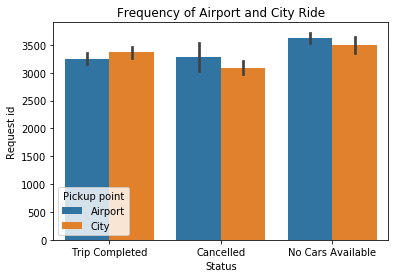

In [191]:
#Plot shows the no of request and pickup point and status(Cancellation,trip complete and No cars available)
plt.ylabel('Total no of Request')
plt.title('Frequency of Airport and City Ride');

sns.barplot(y='Request id',x="Status",hue="Pickup point",data=uber_df)

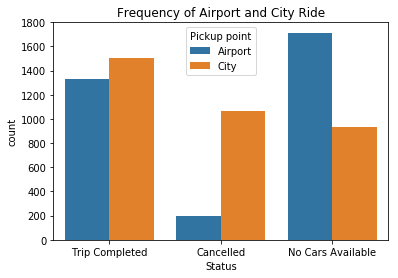

In [192]:
#Plot shows the no of request and pickup point and status(Cancellation,trip complete and No cars available)
plt.ylabel('Total no of Request')
plt.title('Frequency of Airport and City Ride');

sns.countplot(x="Status",hue="Pickup point",data=uber_df)

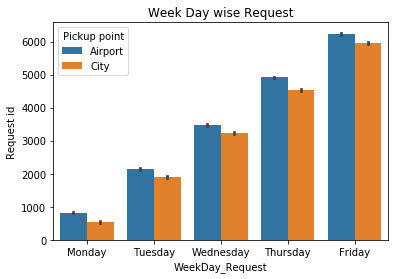

In [193]:
plt.ylabel('Total Request pickup point')
plt.title('Week Day wise Request');

sns.barplot(x="WeekDay_Request",y="Request id",hue="Pickup point",data=uber_df)

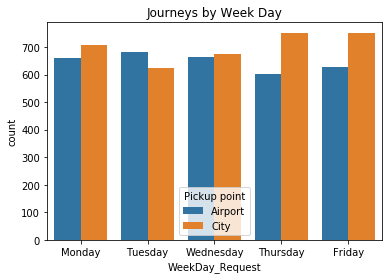

In [194]:
plt.ylabel('Total Request pickup point')
plt.title('Journeys by Week Day');

sns.countplot(x="WeekDay_Request",hue="Pickup point",data=uber_df)

Observation:The requesst are high on Friday .The request on monday are less.As we know lot of people trqavel on friday as w=saturday and sunday are weekends

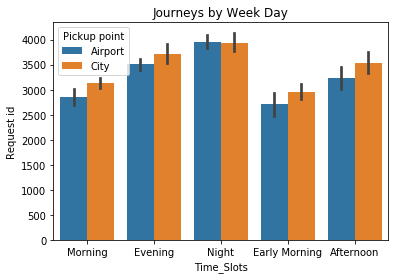

In [195]:
plt.ylabel('Total Request pickup point')
plt.title('Journeys by Week Day');

sns.barplot(x="Time_Slots",y="Request id",hue="Pickup point",data=uber_df)

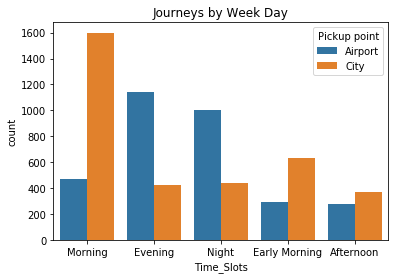

In [196]:
plt.ylabel('Total Request pickup point')
plt.title('Journeys by Week Day');

sns.countplot(x="Time_Slots",hue="Pickup point",data=uber_df)

We can see the Evening and Night the request are high for airport and city

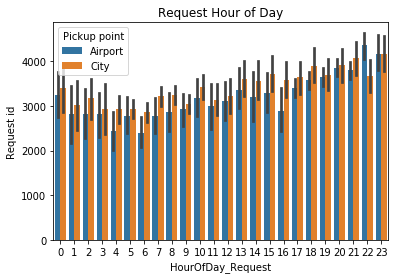

In [197]:
plt.ylabel('Total Request pickup point')
plt.title('Request Hour of Day');

sns.barplot(x="HourOfDay_Request",y="Request id",hue="Pickup point",data=uber_df)

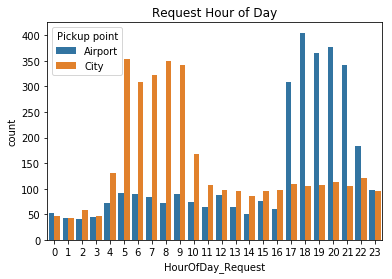

In [198]:
plt.ylabel('Total Request pickup point')
plt.title('Request Hour of Day');

sns.countplot(x="HourOfDay_Request",hue="Pickup point",data=uber_df)

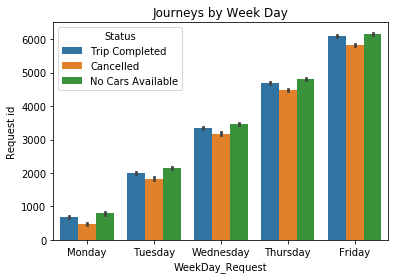

In [199]:

plt.ylabel('Weekday Request')
plt.title('Journeys by Week Day');

sns.barplot(x="WeekDay_Request",y="Request id",hue="Status",data=uber_df)


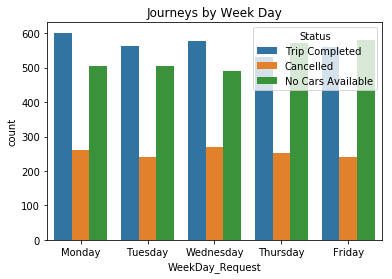

In [200]:
plt.ylabel('Weekday Status')
plt.title('Journeys by Week Day');

sns.countplot(x="WeekDay_Request",hue="Status",data=uber_df)

Thursday and Friday the request are hight and and also the cancellation and No car available is high

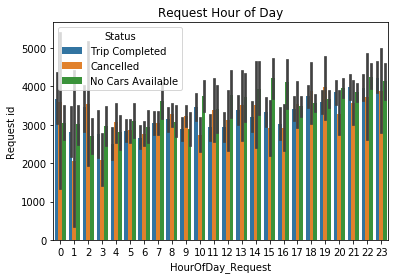

In [201]:
plt.ylabel('Total Request pickup point')
plt.title('Request Hour of Day');

sns.barplot(x="HourOfDay_Request",y="Request id",hue="Status",data=uber_df)

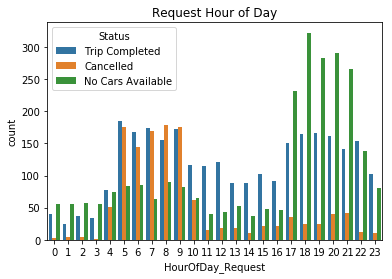

In [202]:
plt.ylabel('Total Request pickup point')
plt.title('Request Hour of Day');

sns.countplot(x="HourOfDay_Request",hue="Status",data=uber_df)

We can see the Frequency of request is highest at 18hrs i.e around 6 pm.Range of 6pm to 9pm

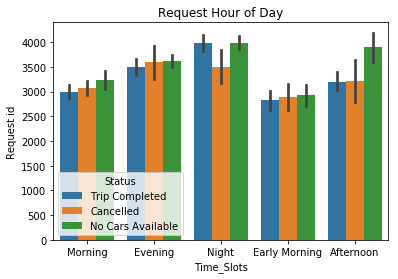

In [203]:
plt.ylabel('Total Request vs Timeslot')
plt.title('Request Hour of Day');
sns.barplot(x='Time_Slots',y="Request id",hue="Status",data=uber_df)

plt.show()

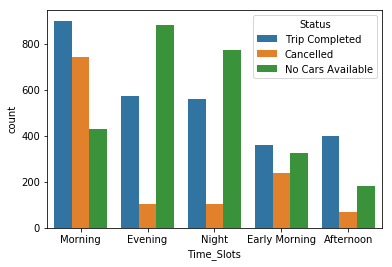

In [204]:
sns.countplot(x='Time_Slots',hue="Status",data=uber_df)

plt.show()

Request and cancellation,trips completed and no car available is hight in the Night.It shows that the demand is high and gap and supply is also high

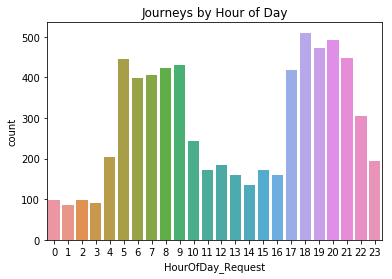

In [205]:
plt.ylabel('Frequency of Request Hours of Day')
plt.title('Journeys by Hour of Day');

sns.countplot(x="HourOfDay_Request",data=uber_df)

/we can see that the Request or can say the demand is hight between 5am to9 am and evening from 5 pm to 9 pm

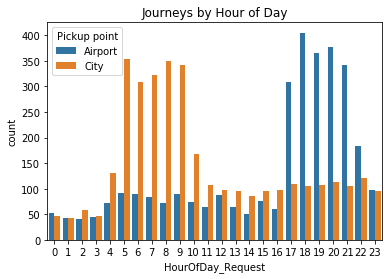

In [206]:
#bar graph to show the total request /vs hour of the day

plt.ylabel('Frequency of Request Hours of Day')
plt.title('Journeys by Hour of Day');

sns.countplot(x="HourOfDay_Request",hue="Pickup point",data=uber_df)

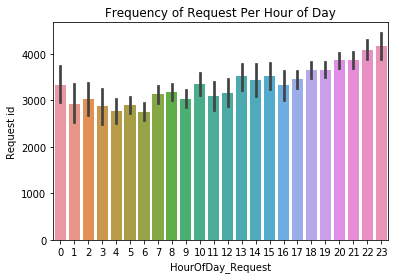

In [207]:
#bar graph to show the total request /vs hour of the day

plt.ylabel('Count of Request id')
plt.title('Frequency of Request Per Hour of Day');

sns.barplot(x="HourOfDay_Request",y="Request id",data=uber_df)

In [208]:
demand'uber_df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,WeekDay_Request,HourOfDay_Request,Time_Slots,Demand_supply
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,Morning,Supply
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,Evening,Supply
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,9,Morning,Supply
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,21,Night,Supply
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,Morning,Supply


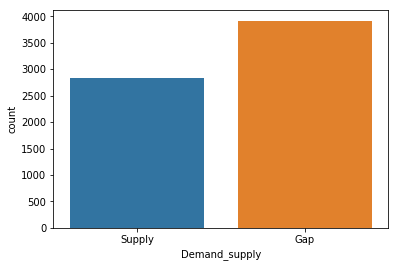

In [209]:
sns.countplot(x='Demand_supply',data=uber_df)

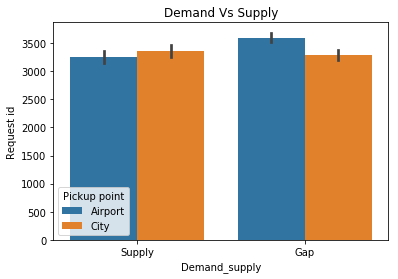

In [221]:
plt.ylabel('Count of Request id')
plt.title("Demand Vs Supply");

sns.barplot(x="Demand_supply",y="Request id",hue="Pickup point",data=uber_df)

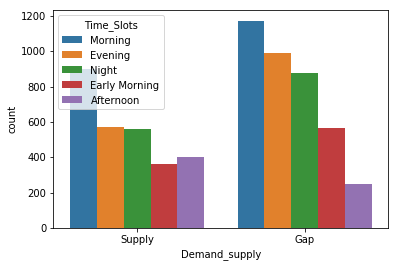

In [211]:
sns.countplot(x='Demand_supply',hue='Time_Slots',data=uber_df)

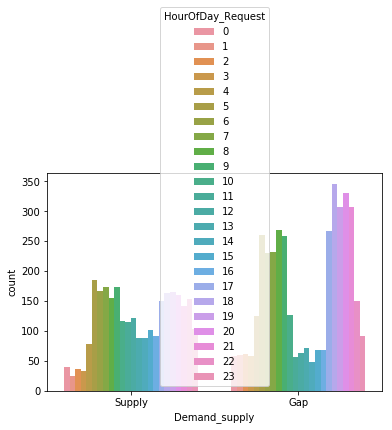

In [212]:
sns.countplot(x='Demand_supply',hue='HourOfDay_Request',data=uber_df)

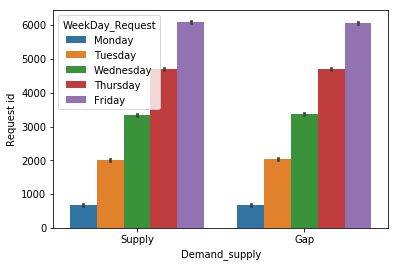

In [213]:
sns.barplot(x='Demand_supply',y="Request id",hue='WeekDay_Request',data=uber_df)

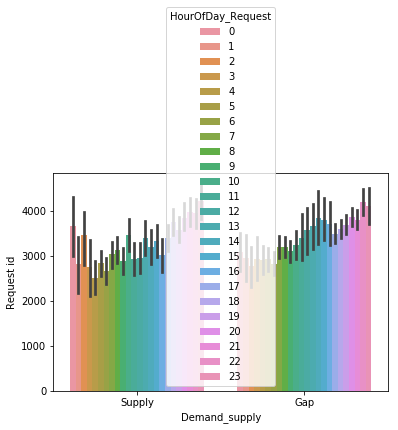

In [214]:
sns.barplot(x='Demand_supply',y="Request id",hue='HourOfDay_Request',data=uber_df)

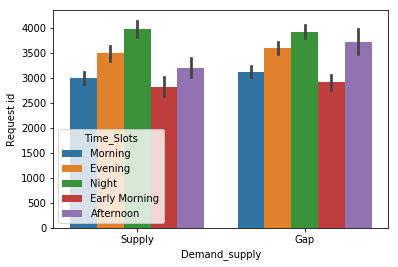

In [215]:
sns.barplot(x='Demand_supply',y="Request id",hue='Time_Slots',data=uber_df)

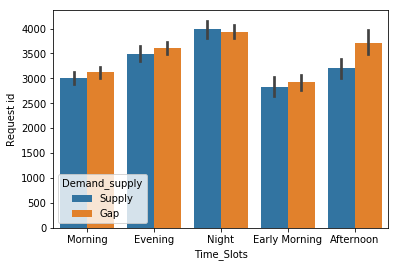

In [216]:
sns.barplot(hue='Demand_supply',y="Request id",x='Time_Slots',data=uber_df)

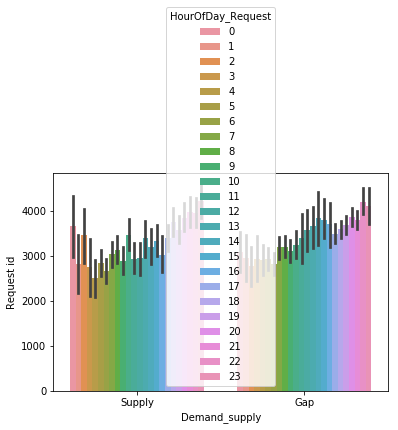

In [217]:
sns.barplot(hue='HourOfDay_Request',y='Request id',x="Demand_supply",data=uber_df)

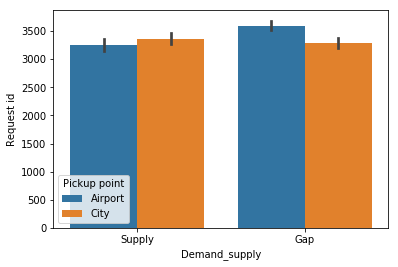

In [218]:
sns.barplot(x='Demand_supply', y='Request id',hue='Pickup point', data=uber_df)
